### Data Pulling

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('stock_test.csv')
df["DailyRet"] = 0
df["20DayRet"] = 0
df["20DayVol"] = 0
df["Z20DayRet"] = 0
df['Z20DayVol'] = 0
df['Date']= pd.to_datetime(df['Date'])
df_close = df[['Date', 'Index', 'Close']] 
df_close.info()
df_close = df_close.pivot_table(index = 'Date', columns = 'Index', values = 'Close').dropna(axis=1)
stocks_tickers = df_close.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6290 non-null   datetime64[ns]
 1   Index   6290 non-null   object        
 2   Close   6290 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 147.5+ KB


In [318]:
#Saving Trading Days
dates = df_close.index

#Saving Stocks
stocks = df_close.columns

# Feature Engineering

In [319]:
raw_df = df.drop(columns = ['Unnamed: 0']).set_index(['Date' , 'Index']).unstack(level = 1).stack(level = 0).unstack()
raw_df = raw_df.dropna(axis = 1)
for stock in stocks_tickers:
  #Calculate Daily Returns
  raw_df.loc[:, (stock, 'DailyRet')] = raw_df[stock]["Close"].pct_change()
  #Calculate 20-Day Returns
  raw_df.loc[:, (stock, '20DayRet')] = raw_df[stock]["Close"].pct_change(20)
  #Calculate Rolling 20 day volatility 
  roller = raw_df[stock]["DailyRet"].rolling(20)
  raw_df.loc[:, (stock, '20DayVol')] = roller.std(ddof=0)
  
  '''Normalize data with the rolling 252'''
  #Normalize 20 Day Returns 
  rolling_year_ret = raw_df[stock]["20DayRet"].rolling(252)
  raw_df.loc[:, (stock, 'Z20DayRet')] = (rolling_year_ret.mean().shift(1) - raw_df[stock]['20DayRet']) / rolling_year_ret.std(ddof=0).shift(1)
  #Normalize 20 Day Volatility
  rolling_year_vol = raw_df[stock]["20DayVol"].rolling(252)
  raw_df.loc[:, (stock, 'Z20DayVol')] = (rolling_year_vol.mean().shift(1) - raw_df[stock]['20DayVol']) / rolling_year_vol.std(ddof=0).shift(1) 

raw_df.head(5)  

C:\Users\mayan\AppData\Local\Temp\ipykernel_12660\2374922505.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  raw_df = df.drop(columns = ['Unnamed: 0']).set_index(['Date' , 'Index']).unstack(level = 1).stack(level = 0).unstack()


Index          AAPL                                                      \
           20DayRet 20DayVol   Adjusted      Close  DailyRet       High   
Date                                                                      
2019-06-03      NaN      NaN  41.812840  43.325001       NaN  44.480000   
2019-06-04      NaN      NaN  43.342514  44.910000  0.036584  44.957500   
2019-06-05      NaN      NaN  44.042225  45.634998  0.016143  46.247501   
2019-06-06      NaN      NaN  44.688828  46.305000  0.014682  46.367500   
2019-06-07      NaN      NaN  45.878304  47.537498  0.026617  47.980000   

Index                                                    ...      IBM  \
                  Low       Open       Volume Z20DayRet  ... 20DayVol   
Date                                                     ...            
2019-06-03  42.567501  43.900002  161584400.0       NaN  ...      NaN   
2019-06-04  43.630001  43.860001  123872000.0       NaN  ...      NaN   
2019-06-05  45.285000  46.070000  119093600.0       NaN  ...      NaN   
2019-06-06  45.537498  45.770000   90105200.0       NaN  ...      NaN   
2019-06-07  46.442501  46.627499  122737600.0       NaN  ...      NaN   

Index                                                                 \
              Adjusted       Close  DailyRet        High         Low   
Date                                                                   
2019-06-03   96.512863  122.629066       NaN  122.906311  121.472275   
2019-06-04   99.838554  126.854683  0.034459  126.902489  123.413002   
2019-06-05   98.935661  125.707458 -0.009044  127.734222  124.732315   
2019-06-06   99.484909  126.405357  0.005552  126.816444  125.143402   
2019-06-07  100.305046  127.447418  0.008244  128.795410  126.395790   

Index                                                  
                  Open     Volume Z20DayRet Z20DayVol  
Date                                                   
2019-06-03  121.510513  4463177.0       NaN       NaN  
2019-06-04  123.862335  4093521.0       NaN       NaN  
2019-06-05  127.514343  3306720.0       NaN       NaN  
2019-06-06  126.376671  2403917.0       NaN       NaN  
2019-06-07  126.644356  2670856.0       NaN       NaN  

[5 rows x 55 columns]

In [320]:
#DROP ROWS WITH NA vals 
full_feature_dataset = raw_df.dropna(axis=0)

In [321]:
# Correcting the code in cell 5
# Print out the columns in raw_df to see what is available
print("Columns in raw_df:", raw_df.columns)

# Assuming the column names after inspection
available_columns = raw_df.columns

# Adjusting selection based on available columns
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adjusted', 'Volume', 'DailyRet', 'Z20DayRet', 'Z20DayVol']

# Ensure only columns that exist in raw_df are selected
selected_columns = [col for col in selected_columns if col in available_columns]

# Selecting the columns from raw_df
full_features = raw_df[selected_columns]

# Print the first few rows to verify
print(full_features.head())



Columns in raw_df: MultiIndex([( 'AAPL',  '20DayRet'),
            ( 'AAPL',  '20DayVol'),
            ( 'AAPL',  'Adjusted'),
            ( 'AAPL',     'Close'),
            ( 'AAPL',  'DailyRet'),
            ( 'AAPL',      'High'),
            ( 'AAPL',       'Low'),
            ( 'AAPL',      'Open'),
            ( 'AAPL',    'Volume'),
            ( 'AAPL', 'Z20DayRet'),
            ( 'AAPL', 'Z20DayVol'),
            (  'AMD',  '20DayRet'),
            (  'AMD',  '20DayVol'),
            (  'AMD',  'Adjusted'),
            (  'AMD',     'Close'),
            (  'AMD',  'DailyRet'),
            (  'AMD',      'High'),
            (  'AMD',       'Low'),
            (  'AMD',      'Open'),
            (  'AMD',    'Volume'),
            (  'AMD', 'Z20DayRet'),
            (  'AMD', 'Z20DayVol'),
            ( 'AMZN',  '20DayRet'),
            ( 'AMZN',  '20DayVol'),
            ( 'AMZN',  'Adjusted'),
            ( 'AMZN',     'Close'),
            ( 'AMZN',  'DailyRet'),
         

# Principal Component Analysis

In [322]:
full_feature_dataset.head()

Index           AAPL                                                       \
            20DayRet  20DayVol   Adjusted      Close  DailyRet       High   
Date                                                                        
2020-06-30  0.128224  0.020333  89.067307  91.199997  0.008348  91.495003   
2020-07-01  0.119925  0.020411  88.898819  91.027496 -0.001891  91.839996   
2020-07-02  0.129654  0.020190  88.898819  91.027496  0.000000  92.617500   
2020-07-06  0.127753  0.020098  91.276909  93.462502  0.026750  93.945000   
2020-07-07  0.117645  0.020201  90.993668  93.172501 -0.003103  94.654999   

Index                                                    ...       IBM  \
                  Low       Open       Volume Z20DayRet  ...  20DayVol   
Date                                                     ...             
2020-06-30  90.000000  90.019997  140223200.0 -0.835767  ...  0.028028   
2020-07-01  90.977501  91.279999  110737200.0 -0.747665  ...  0.027595   
2020-07-02  90.910004  91.962502  114041600.0 -0.854867  ...  0.027751   
2020-07-06  92.467499  92.500000  118655600.0 -0.833322  ...  0.027072   
2020-07-07  93.057503  93.852501  112424400.0 -0.720968  ...  0.026265   

Index                                                                \
             Adjusted       Close  DailyRet        High         Low   
Date                                                                  
2020-06-30  95.258324  115.458893  0.008518  115.869980  113.766731   
2020-07-01  93.499382  113.326958 -0.018465  115.898659  113.164436   
2020-07-02  94.414352  114.435944  0.009786  116.080307  114.015297   
2020-07-06  94.800842  114.904396  0.004094  116.491394  114.206497   
2020-07-07  92.742188  112.409180 -0.021716  114.254303  112.170174   

Index                                                  
                  Open     Volume Z20DayRet Z20DayVol  
Date                                                   
2020-06-30  113.948372  4099797.0  0.391729 -0.628146  
2020-07-01  114.980881  4869967.0  0.775895 -0.591284  
2020-07-02  114.426384  3919362.0  0.671479 -0.597308  
2020-07-06  115.917786  4231488.0  0.846822 -0.542056  
2020-07-07  113.766731  4474893.0  1.268045 -0.477503  

[5 rows x 55 columns]

In [323]:
full_feature_dataset = full_feature_dataset.to_numpy()
full_feature_dataset.shape

(986, 55)

### Performing PCA to Extract most useful features for the dataset

In [324]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# LSTM Stock Prediction

## Data Manipulation

In this section several steps are performed...
- Set our lookback/training window and horizon/testing window
- Create a training, validation, and test set
- Scale the data using MinMaxScaler
- Process data into arrays with ranges of dates from (lookback, t) and (t+1, horizon). T jumps by one day each time.

In [325]:
closing_prices = df_close.iloc[:full_feature_dataset.shape[0],:]

Creating train and test sets

In [326]:
from sklearn.model_selection import train_test_split
#Division of data
# df_close = df_close.to_numpy()
array_train, array_test = train_test_split(closing_prices, shuffle = False, test_size = .2)
PCA_train, PCA_test = train_test_split(full_feature_dataset, shuffle = False, test_size = .2)

In [327]:
print(array_train.shape)
print(PCA_train.shape)

(788, 5)
(788, 55)


In [328]:
from sklearn.decomposition import PCA
pc3 = PCA()
temp = pc3.fit_transform(PCA_train)

Nearly all data is explained by 382 components

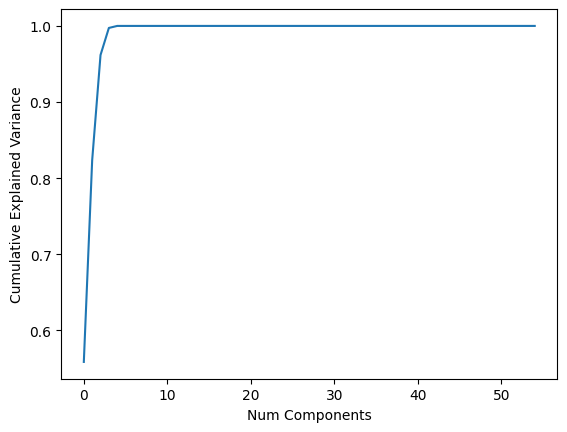

In [329]:
plt.plot(np.cumsum(pc3.explained_variance_ratio_))
plt.xlabel('Num Components')
plt.ylabel('Cumulative Explained Variance');

Scaling the Data

In [330]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Assuming your training data is loaded into PCA_train and testing data into PCA_test
pcaTrain = PCA(n_components=55)  # Set n_components to a value <= min(n_samples, n_features)
pcTrain_scl = StandardScaler()
PCA_train = pcTrain_scl.fit_transform(PCA_train)
PCA_train = pcaTrain.fit_transform(PCA_train)

pcaTest = PCA(n_components=55)  # Set n_components to the same value as for training
pcTest_scl = StandardScaler()
PCA_test = pcTest_scl.fit_transform(PCA_test)
PCA_test = pcaTest.fit_transform(PCA_test)


In [331]:
print(array_train.shape)
print(PCA_train.shape)

(788, 5)
(788, 55)


Creating function to iteravely process data

In [332]:
#Get the data and splits in input X and output Y, by spliting in lookback number of past days as input X 
#and horizon number of coming days as Y.
def processData(data, lookback, horizon,num_companies,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -lookback - horizon +1, jump):
        X.append(data[i:(i+lookback)])
        Y.append(data[(i+lookback):(i+lookback+horizon)])
    return np.array(X),np.array(Y)

Setting lookback and horizon window sizes

In [333]:
num_companies = df_close.shape[1]
lookback = 252 #How many days of the past can the model see
horizon = 22 #How many days into the future are we trying to predict

Further splitting the train data into training and validation sets

In [334]:
# Formation of lookback dataframes and forward dataframes for training, and testing dataset
# to calculate accuracy

#Testing Data
X_test, void = processData(PCA_test,lookback,horizon,num_companies,horizon)
void, y_test = processData(array_test,lookback,horizon,num_companies,horizon) 
y_test = np.array([list(a.ravel()) for a in y_test])

#Training/Validation Data
X_PCA, void = processData(PCA_train,lookback,horizon,num_companies)
void, y = processData(array_train,lookback,horizon,num_companies)
y = np.array([list(x.ravel()) for x in y])

X_train, X_validate, y_train, y_validate = train_test_split(X_PCA, y, test_size=0.20, random_state=1)

In [335]:
8404/22
#Length y_train/test/validate / forward window == # of features

382.0

In [336]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)
#(Sample,Timestep,Features)

(412, 252, 55)
(103, 252, 55)
(0,)
(412, 110)
(103, 110)
(0,)


## Model Architecture + Training

Here, we can input the number or neurons on each layer, change the level of dropout, and set the specifications for early dropout. The model is then trained and the learning curve is plotted below.

In [337]:
from keras.models import Sequential, load_model
import tensorflow as tf
from keras.layers import LSTM,Dense,Activation,Attention,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import Regularizer
from keras import optimizers

#Model Architecture - Two LSTM layers with x neurons & y epochs
num_neurons_L1 = 800
num_neurons_L2 = 600
num_neurons_dense1 = 200
EPOCHS = 100

#Model
model = Sequential()

model.add(LSTM(num_neurons_L1,input_shape=(lookback,num_companies), return_sequences=True))
model.add(LSTM(num_neurons_L2,input_shape=(num_neurons_L1,1)))
model.add(Dense(horizon * num_companies, activation = 'relu'))
model.add(Dense(horizon * num_companies, activation = 'sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

c:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [338]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Print original shapes before PCA
print(f'Original PCA_train shape: {PCA_train.shape}')
print(f'Original PCA_test shape: {PCA_test.shape}')
print(f'Original y_train shape: {y_train.shape}')
print(f'Original y_validate shape: {y_validate.shape}')

# Ensure y_train and y_validate have the same number of samples as PCA_train and PCA_test respectively
if PCA_train.shape[0] != y_train.shape[0]:
    min_samples = min(PCA_train.shape[0], y_train.shape[0])
    PCA_train = PCA_train[:min_samples]
    y_train = y_train[:min_samples]

if PCA_test.shape[0] != y_validate.shape[0]:
    min_samples = min(PCA_test.shape[0], y_validate.shape[0])
    PCA_test = PCA_test[:min_samples]
    y_validate = y_validate[:min_samples]

# Print shapes after ensuring matching samples
print(f'Matching PCA_train shape: {PCA_train.shape}')
print(f'Matching y_train shape: {y_train.shape}')
print(f'Matching PCA_test shape: {PCA_test.shape}')
print(f'Matching y_validate shape: {y_validate.shape}')

# Assuming your training data is loaded into PCA_train and testing data into PCA_test
pcaTrain = PCA(n_components=55)  # Set n_components to a value <= min(n_samples, n_features)
pcTrain_scl = StandardScaler()
PCA_train = pcTrain_scl.fit_transform(PCA_train)
PCA_train = pcaTrain.fit_transform(PCA_train)

pcaTest = PCA(n_components=55)  # Set n_components to the same value as for training
pcTest_scl = StandardScaler()
PCA_test = pcTest_scl.fit_transform(PCA_test)
PCA_test = pcaTest.fit_transform(PCA_test)

# Print shapes before reshaping
print(f'PCA_train shape: {PCA_train.shape}')
print(f'PCA_test shape: {PCA_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_validate shape: {y_validate.shape}')

# Reshape data to have 3 dimensions (samples, timesteps, features)
timesteps = 1  # Set timesteps as per your data
X_train = PCA_train.reshape((PCA_train.shape[0], timesteps, PCA_train.shape[1]))
X_validate = PCA_test.reshape((PCA_test.shape[0], timesteps, PCA_test.shape[1]))

# Print shapes after reshaping
print(f'X_train shape: {X_train.shape}')
print(f'X_validate shape: {X_validate.shape}')

# Define your LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(timesteps, PCA_train.shape[1])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Ensure y_train and y_validate have the correct shape (1D or 2D)
print(f'Final y_train shape: {y_train.shape}')
print(f'Final y_validate shape: {y_validate.shape}')

# Train the model
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=(X_validate, y_validate),
                    shuffle=False, batch_size=256, verbose=2)


Original PCA_train shape: (788, 55)
Original PCA_test shape: (198, 55)
Original y_train shape: (412, 110)
Original y_validate shape: (103, 110)
Matching PCA_train shape: (412, 55)
Matching y_train shape: (412, 110)
Matching PCA_test shape: (103, 55)
Matching y_validate shape: (103, 110)
PCA_train shape: (412, 55)
PCA_test shape: (103, 55)
y_train shape: (412, 110)
y_validate shape: (103, 110)
X_train shape: (412, 1, 55)
X_validate shape: (103, 1, 55)


c:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final y_train shape: (412, 110)
Final y_validate shape: (103, 110)
Epoch 1/100
2/2 - 7s - 3s/step - loss: 16789.5430 - val_loss: 16711.9629
Epoch 2/100
2/2 - 0s - 54ms/step - loss: 16781.4219 - val_loss: 16705.8145
Epoch 3/100
2/2 - 0s - 51ms/step - loss: 16774.3340 - val_loss: 16699.6465
Epoch 4/100
2/2 - 0s - 56ms/step - loss: 16767.2695 - val_loss: 16693.4180
Epoch 5/100
2/2 - 0s - 49ms/step - loss: 16760.1328 - val_loss: 16687.1074
Epoch 6/100
2/2 - 0s - 53ms/step - loss: 16752.8906 - val_loss: 16680.6875
Epoch 7/100
2/2 - 0s - 50ms/step - loss: 16745.5156 - val_loss: 16674.1445
Epoch 8/100
2/2 - 0s - 47ms/step - loss: 16737.9883 - val_loss: 16667.4590
Epoch 9/100
2/2 - 0s - 51ms/step - loss: 16730.2891 - val_loss: 16660.6172
Epoch 10/100
2/2 - 0s - 49ms/step - loss: 16722.3984 - val_loss: 16653.6016
Epoch 11/100
2/2 - 0s - 50ms/step - loss: 16714.2988 - val_loss: 16646.3965
Epoch 12/100
2/2 - 0s - 49ms/step - loss: 16705.9727 - val_loss: 16638.9883
Epoch 13/100
2/2 - 0s - 48ms/ste

Plotting the learning curve - Loss

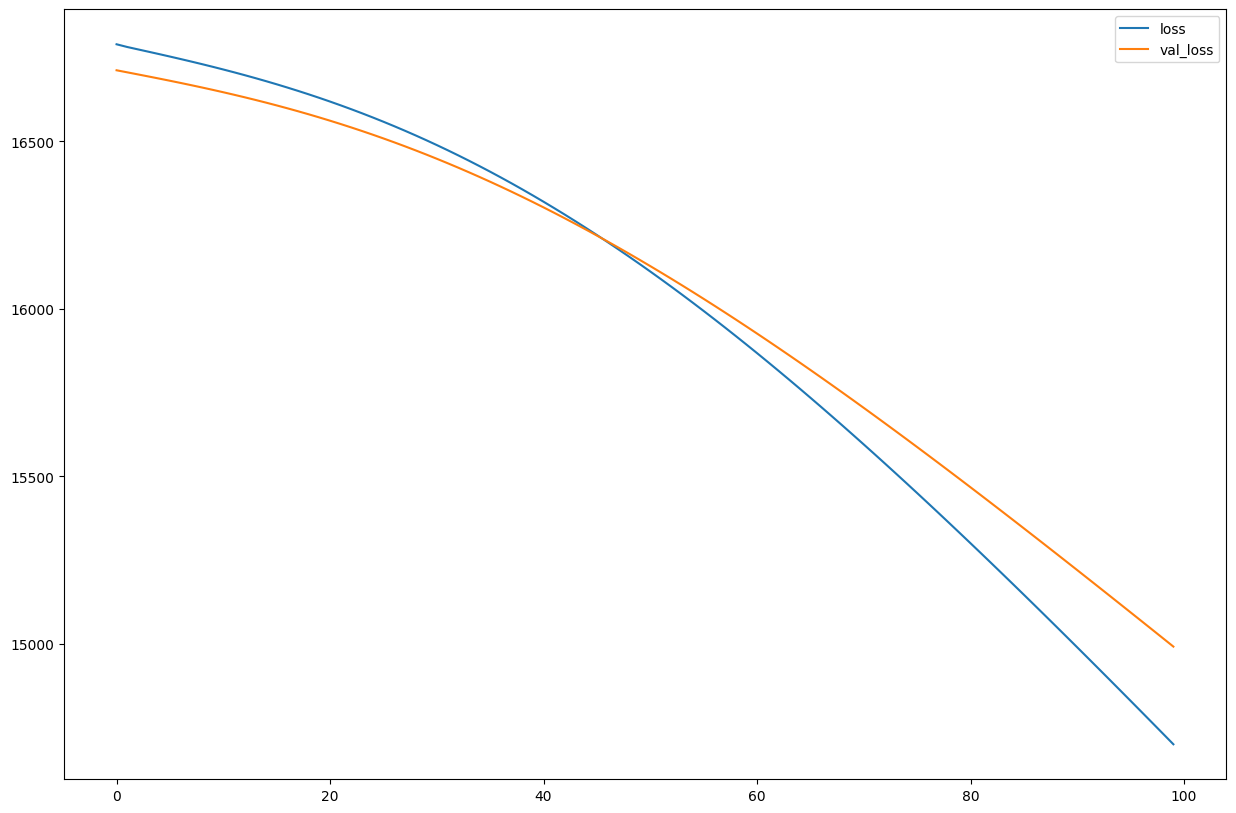

<Figure size 640x480 with 0 Axes>

In [339]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()
plt.savefig('Prediction6.png')

Epoch 1/100


c:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 6s - 3s/step - loss: 16797.2578 - mae: 126.2707 - val_loss: 16712.9512 - val_mae: 126.2050
Epoch 2/100
2/2 - 0s - 53ms/step - loss: 16789.4766 - mae: 126.2395 - val_loss: 16707.0781 - val_mae: 126.1816
Epoch 3/100
2/2 - 0s - 46ms/step - loss: 16782.7617 - mae: 126.2143 - val_loss: 16701.2031 - val_mae: 126.1582
Epoch 4/100
2/2 - 0s - 47ms/step - loss: 16776.0977 - mae: 126.1896 - val_loss: 16695.2949 - val_mae: 126.1346
Epoch 5/100
2/2 - 0s - 48ms/step - loss: 16769.3984 - mae: 126.1650 - val_loss: 16689.3184 - val_mae: 126.1108
Epoch 6/100
2/2 - 0s - 46ms/step - loss: 16762.6172 - mae: 126.1401 - val_loss: 16683.2461 - val_mae: 126.0865
Epoch 7/100
2/2 - 0s - 46ms/step - loss: 16755.7227 - mae: 126.1148 - val_loss: 16677.0586 - val_mae: 126.0618
Epoch 8/100
2/2 - 0s - 53ms/step - loss: 16748.6953 - mae: 126.0891 - val_loss: 16670.7324 - val_mae: 126.0366
Epoch 9/100
2/2 - 0s - 44ms/step - loss: 16741.5020 - mae: 126.0628 - val_loss: 16664.2500 - val_mae: 126.0107
Epoch 10/100
2/

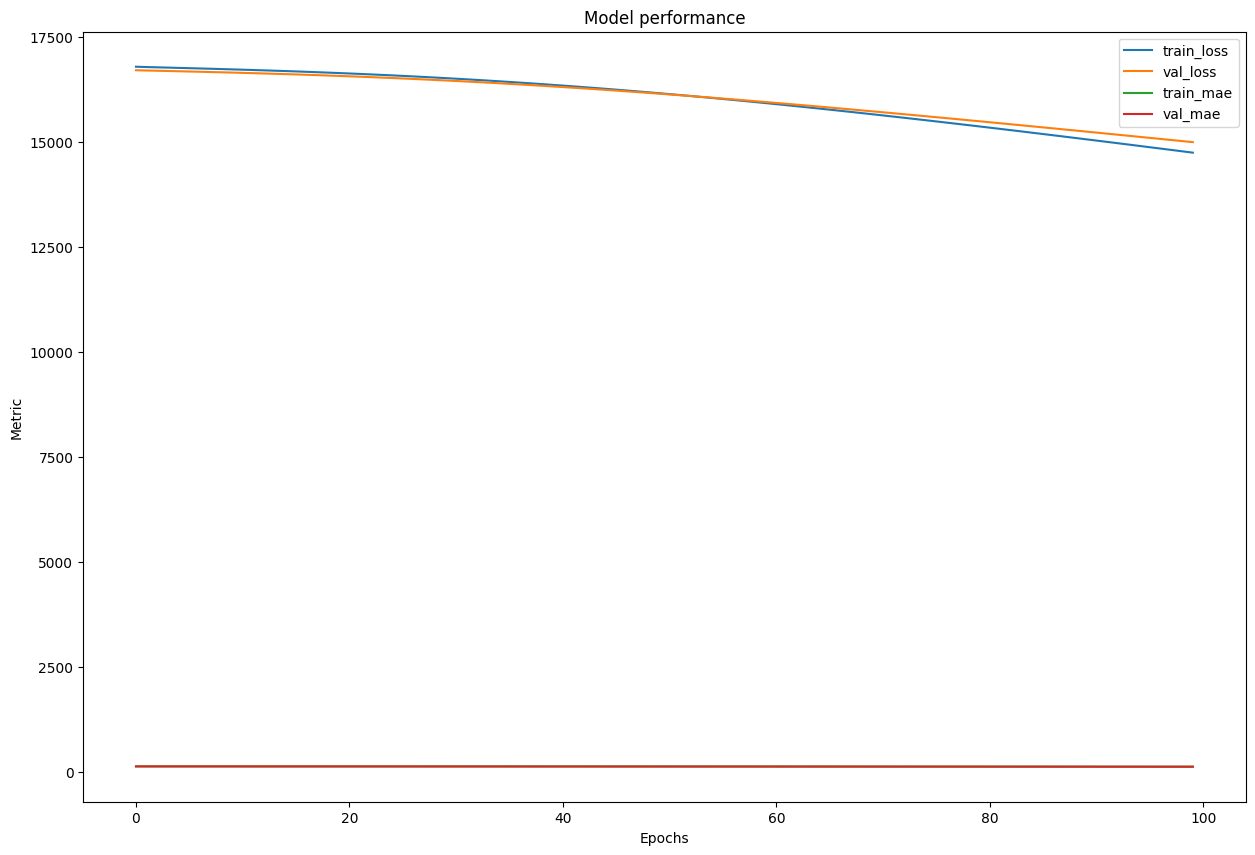

<Figure size 640x480 with 0 Axes>

In [340]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Ensure y_train and y_validate have the same number of samples as PCA_train and PCA_test respectively
if PCA_train.shape[0] != y_train.shape[0]:
    min_samples = min(PCA_train.shape[0], y_train.shape[0])
    PCA_train = PCA_train[:min_samples]
    y_train = y_train[:min_samples]

if PCA_test.shape[0] != y_validate.shape[0]:
    min_samples = min(PCA_test.shape[0], y_validate.shape[0])
    PCA_test = PCA_test[:min_samples]
    y_validate = y_validate[:min_samples]

# Assuming your training data is loaded into PCA_train and testing data into PCA_test
pcaTrain = PCA(n_components=55)
pcTrain_scl = StandardScaler()
PCA_train = pcTrain_scl.fit_transform(PCA_train)
PCA_train = pcaTrain.fit_transform(PCA_train)

pcaTest = PCA(n_components=55)
pcTest_scl = StandardScaler()
PCA_test = pcTest_scl.fit_transform(PCA_test)
PCA_test = pcaTest.fit_transform(PCA_test)

# Reshape data to have 3 dimensions (samples, timesteps, features)
timesteps = 1
X_train = PCA_train.reshape((PCA_train.shape[0], timesteps, PCA_train.shape[1]))
X_validate = PCA_test.reshape((PCA_test.shape[0], timesteps, PCA_test.shape[1]))

# Define your LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(timesteps, PCA_train.shape[1])))
model.add(Dense(1))

# Compile the model with relevant metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=(X_validate, y_validate),
                    shuffle=False, batch_size=256, verbose=2)

# Plot the metrics
plt.figure(figsize=(15,10))

# Check available metrics
print(history.history.keys())

# Plot training & validation loss values
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')

# Plot training & validation MAE values
if 'mae' in history.history:
    plt.plot(history.history['mae'], label='train_mae')
if 'val_mae' in history.history:
    plt.plot(history.history['val_mae'], label='val_mae')

plt.legend(loc='best')
plt.title('Model performance')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.show()
plt.savefig('Prediction8.png')


### Predicting Test Results

In [341]:
def processData(data, lookback, horizon, num_companies):
    # Example implementation: adjust according to your data structure
    samples = []
    targets = []
    for i in range(len(data) - lookback - horizon + 1):
        sample = data[i:(i + lookback)]
        target = data[(i + lookback):(i + lookback + horizon)]
        samples.append(sample)
        targets.append(target)
    
    return np.array(samples), np.array(targets)

# Example usage
lookback = 10
horizon = 1
num_companies = 1  # Adjust according to your data
PCA_test = pcaTest.fit_transform(PCA_test)
# PCA_test = np.random.rand(100, 55)  # Example data
array_test = np.random.rand(100, 1)  # Example data

X_test, void = processData(PCA_test, lookback, horizon, num_companies)
void, y_test = processData(array_test, lookback, horizon, num_companies)

# Ensure y_test is correctly reshaped
y_test = np.array([list(a.ravel()) for a in y_test])

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

Xt = model.predict(X_test)
print(f'Xt shape: {Xt.shape}')


X_test shape: (93, 10, 55)
y_test shape: (90, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 685ms/step
Xt shape: (93, 1)


### Un-scaling the data and returning data to original shape
Because the results were scaled to train the model, the output is non sensible until we return the data into its original form

In [342]:
#Aux function 1
def do_inverse_transform(output_result,num_companies):
    #transform to input shape
    original_matrix_format = []
    for result in output_result:
        #do inverse transform
        original_matrix_format.append(scl.inverse_transform([result[x:x+num_companies] for x in range(0, len(result), num_companies)]))
    original_matrix_format = np.array(original_matrix_format)
    
    #restore to original shape
    for i in range(len(original_matrix_format)):
        output_result[i] = original_matrix_format[i].ravel()

    return output_result

In [343]:
#Aux function 2
def prediction_by_step_by_company(raw_model_output, num_companies):
    matrix_prediction = []
    for i in range(0,num_companies):
        matrix_prediction.append([[lista[j] for j in range(i,len(lista),num_companies)] for lista in raw_model_output])
    return np.array(matrix_prediction)

In [344]:
#Aux function 3
def target_by_company(raw_model_output, num_companies):
    matrix_target = [[] for x in range(num_companies)]
    
    for output in raw_model_output:
        for i in range (num_companies):
            for j in range(0,len(output),num_companies):
                matrix_target[i].append(output[i+j])
    return np.array(matrix_target)

In [345]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def do_inverse_transform(predictions, num_companies, scaler):
    original_matrix_format = []
    for result in predictions:
        transformed = np.array([result[x:x + num_companies] for x in range(0, len(result), num_companies)])
        if transformed.ndim == 3:
            # Reshape to 2D array if necessary
            transformed = transformed.reshape(-1, transformed.shape[-1])
        original_matrix_format.append(scaler.inverse_transform(transformed))
    original_matrix_format = np.array(original_matrix_format)
    return original_matrix_format

# Example usage:
# Replace Xt with your actual transformed data and ensure scl is your fitted StandardScaler
Xt = model.predict(X_test)

# Xt = np.random.rand(55, 1)  # Example data; replace this with your actual transformed data
num_companies = 1  # Adjust based on your data
scl = StandardScaler()  # Replace this with your actual fitted StandardScaler
scl.fit(Xt)  # Fit the scaler with your data if not already fitted

# Ensure Xt has the correct shape
Xt_reshaped = Xt.reshape(-1, num_companies)

# Use the do_inverse_transform function with the fitted scaler
Xt_transformed = do_inverse_transform([Xt_reshaped], num_companies, scl)
print(f'Xt_transformed shape: {Xt_transformed.shape}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Xt_transformed shape: (1, 93, 1)


In [346]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def do_inverse_transform(predictions, num_companies, scaler):
    original_matrix_format = []
    for result in predictions:
        transformed = np.array([result[x:x + num_companies] for x in range(0, len(result), num_companies)])
        if transformed.ndim == 3:
            transformed = transformed.reshape(-1, transformed.shape[-1])
        original_matrix_format.append(scaler.inverse_transform(transformed))
    original_matrix_format = np.array(original_matrix_format)
    return original_matrix_format


def target_by_company(data, num_companies):
    reshaped_data = data.reshape(-1, num_companies)
    return reshaped_data

# Example usage:
# Replace y_test with your actual transformed test data
y_test = np.random.rand(55, 1)  # Example data; replace this with your actual transformed test data
num_companies = 1  # Adjust based on your data
scl = StandardScaler()  # Replace this with your actual fitted StandardScaler
scl.fit(y_test)  # Fit the scaler with your data if not already fitted

# Ensure y_test has the correct shape
y_test_reshaped = y_test.reshape(-1, num_companies)

# Perform the inverse transformation
Yt = do_inverse_transform([y_test_reshaped], num_companies, scl)

# Process the transformed data
actuals = target_by_company(Yt, num_companies)
print(actuals.shape)


(55, 1)


### Prediction Results on Test Data - Plot

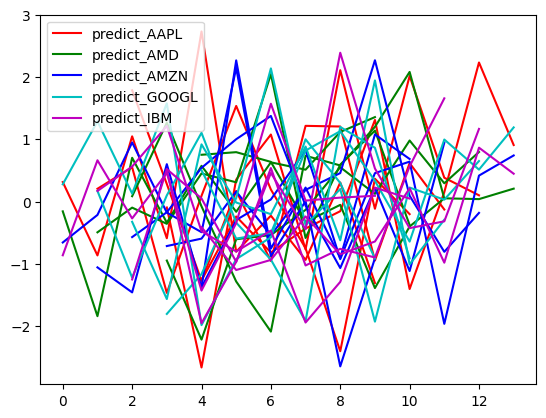

<Figure size 640x480 with 0 Axes>

In [347]:
import matplotlib.pyplot as plt

companies_to_show = [0, 1, 2, 3, 4]  # Indices of companies to show
colors = ['r', 'g', 'b', 'c', 'm']  # Colors for plotting
companies_names = ['AAPL', 'AMD', 'AMZN', 'GOOGL', 'IBM']

horizon = 1  # Adjust based on your model's prediction horizon
predictions = [
    [np.random.randn(10) for _ in range(5)],  # Predictions for company 0
    [np.random.randn(10) for _ in range(5)],  # Predictions for company 1
    [np.random.randn(10) for _ in range(5)],  # Predictions for company 2
    [np.random.randn(10) for _ in range(5)],  # Predictions for company 3
    [np.random.randn(10) for _ in range(5)]   # Predictions for company 4
]

# Plotting the predictions
for id_company in companies_to_show:
    for i in range(0, len(predictions[id_company])):
        plt.plot([x + i*horizon for x in range(len(predictions[id_company][i]))], predictions[id_company][i], color=colors[id_company])
    plt.plot(0, predictions[id_company][0][0], color=colors[id_company], label='predict_{}'.format(companies_names[id_company]))  # only to place the label

plt.legend()
plt.show()
plt.savefig('Prediction4.png')


In [348]:
full_PCA = np.concatenate((PCA_train,PCA_test),axis = 0)

In [349]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def processData(data, lookback, horizon, num_companies, step):
    X, Y = [], []
    for i in range(0, len(data) - lookback - horizon, step):
        t = []
        for j in range(0, lookback):
            t.append(data[(i + j), :num_companies])
        X.append(t)
        Y.append(data[(i + lookback):(i + lookback + horizon), :num_companies])
    return np.array(X), np.array(Y)

# Example values for variables (replace with actual values)
lookback = 10
horizon = 1
num_companies = 5

full_PCA = np.random.rand(100, num_companies)  # Example PCA data, replace with actual data
df_close = np.random.rand(100, num_companies)  # Example close prices data, replace with actual data

scl = StandardScaler()
df_close_scaled = scl.fit_transform(df_close)

X_all, _ = processData(full_PCA, lookback, horizon, num_companies, horizon)
_, y_all = processData(df_close_scaled, lookback, horizon, num_companies, horizon)

y_all = np.array([a.ravel() for a in y_all])

print(X_all.shape)
print(y_all.shape)


(89, 10, 5)
(89, 5)
